In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.random import uniform
from numpy.random import normal
import statsmodels.api as sm
%matplotlib inline

C:\Python64\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
X = uniform(0, 1, 100)
Y = np.sin(12*(X+0.2))/(X+0.2) + normal(0, 1, 100)
x = np.linspace(0, 1, 100)
y = np.sin(12*(x+0.2))/(x+0.2)

In [5]:
np.vstack((X, Y)).T

array([[ 5.85768427e-01, -1.39336991e+00],
       [ 1.90935794e-01, -1.88768761e+00],
       [ 6.12480410e-01,  2.87453273e-02],
       [ 1.84879554e-01, -4.40811078e+00],
       [ 9.44229306e-01,  1.07180420e+00],
       [ 3.21051142e-01, -9.95948330e-01],
       [ 9.66100844e-01,  4.05950253e-01],
       [ 1.80808567e-01, -1.36979514e-01],
       [ 5.47096242e-01,  8.67123293e-01],
       [ 4.43211281e-01,  1.88397333e+00],
       [ 8.64050510e-01, -2.00673061e+00],
       [ 9.56088966e-01,  2.13002494e+00],
       [ 3.82246032e-01,  7.85791881e-02],
       [ 5.23579059e-01,  3.11791051e+00],
       [ 5.34713917e-01, -1.67315249e+00],
       [ 6.98601044e-01, -1.76391339e+00],
       [ 6.66842281e-01,  1.01746514e-01],
       [ 9.52974133e-01,  8.01579010e-02],
       [ 7.98387613e-01, -2.17618930e+00],
       [ 4.77659219e-01,  1.00928654e+00],
       [ 2.18512756e-01, -2.78658086e+00],
       [ 7.77137741e-01,  5.21976898e-01],
       [ 8.76054088e-01, -1.81367313e-01],
       [ 9.

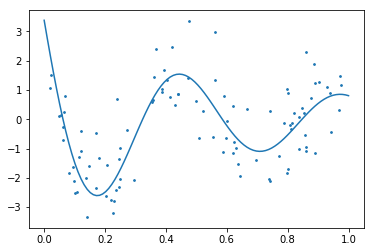

In [3]:
plt.plot(x, y)
plt.scatter(X, Y, s=3)

In [4]:
def dk(x, xi_k, xi_K):
    return (max(0, x-xi_k)**3) / (xi_K-xi_k)

def do_nc_expansion(x, xis):
    X = np.zeros(shape=(x.shape[0], len(xis)))
    for i in range(X.shape[0]):
        X[i, 0] = 1
        X[i, 1] = x[i]
        for k in range(2, len(xis)):
            X[i, k] = dk(x[i], xis[k-2], xis[-1]) - dk(x[i], xis[-2], xis[-1])
    return X

In [5]:
X_unique = np.unique(X)
N = do_nc_expansion(X, X_unique)

In [6]:
ls = sm.OLS(Y, N).fit_regularized(alpha=0.000000000000001, L1_wt=0)
y_hat = ls.predict(do_nc_expansion(x, X_unique))

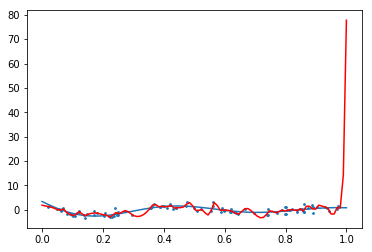

In [7]:
plt.plot(x, y)
plt.scatter(X, Y, s=3)
plt.plot(x, y_hat, color='red')

In [8]:
def a_ij(i, j, a):
    return (a[-1]-a[i]) * (a[-1]-a[j])
def integral_formula(x, i, j, a):
    return (1/a_ij(i, j, a)) * (1/3*(x**3) - 1/2*(x**2)*(a[i]+a[j])+x*a[i]*a[j])
def integral_value(i, j, a):
    xs, xf = a[max(i, j)], a[-1]
    return integral_formula(xf, i, j, a) - integral_formula(xs, i, j, a)
def N_ij(i, j, k, a):
    return 36*(integral_value(i, j, a) - integral_value(i, k-1, a) - integral_value(j, k-1, a) + integral_value(k-1, k-1, a))

In [9]:
def calc_O(x_unique, N):
    O = np.zeros(shape=(N.shape[1], N.shape[1]))
    k = x_unique.shape[0]-1
    for i in range(O.shape[0]):
        for j in range(O.shape[1]):
            if i <= 1 or j <= 1:
                continue
            O[i, j] = N_ij(i-2, j-2, k, x_unique)    
    return O

In [10]:
O = calc_O(X_unique, N)

In [61]:
theta_hat = np.linalg.inv(N.T @ N + 0.00034*O) @ N.T @ Y
y_hat = do_nc_expansion(x, X_unique) @ theta_hat
Sl = N @ np.linalg.inv(N.T @ N + 0.00034*O) @ N.T
#lb = do_nc_expansion(X_unique, X_unique) @ theta_hat - 2*np.sqrt(np.diag(Sl @ Sl.T))
#ub = do_nc_expansion(X_unique, X_unique) @ theta_hat + 2*np.sqrt(np.diag(Sl @ Sl.T))

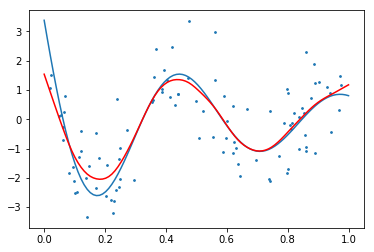

In [62]:
plt.plot(x, y)
plt.scatter(X, Y, s=3)
plt.plot(x, y_hat, color='red')
#plt.fill_between(X_unique, ub, lb, color='y', alpha=.5)

In [63]:
Sl = N @ np.linalg.inv(N.T @ N + 0.0061*O) @ N.T
np.trace(Sl)

4.81464391950291

In [64]:
Sl = N @ np.linalg.inv(N.T @ N + 0.00034*O) @ N.T
np.trace(Sl)

8.837516403803651

In [65]:
Sl = N @ np.linalg.inv(N.T @ N + 0.000034*O) @ N.T
np.trace(Sl)

14.690071801887408

In [66]:
np.diag(Sl @ Sl.T)

array([0.30772501, 0.08702497, 0.16334688, 0.33586328, 0.13469727,
       0.12016026, 0.09700921, 0.13749705, 0.06875221, 0.09135256,
       0.08554157, 0.3186662 , 0.15032515, 0.10294217, 0.09278946,
       0.12170345, 0.12926328, 0.15150455, 0.08367811, 0.13850258,
       0.12511884, 0.09901993, 0.0690609 , 0.0689981 , 0.08727204,
       0.09312536, 0.08509996, 0.09308922, 0.08537738, 0.13400079,
       0.11290522, 0.10122182, 0.08844923, 0.09385592, 0.06314335,
       0.12898969, 0.08264118, 0.16435942, 0.22872093, 0.16655034,
       0.09428844, 0.09714081, 0.07234559, 0.07646523, 0.08382058,
       0.08893411, 0.08434471, 0.16148026, 0.08252649, 0.09808628,
       0.12080386, 0.09702107, 0.09217925, 0.11126668, 0.09829798,
       0.12246415, 0.11138967, 0.08903452, 0.13396947, 0.10031141,
       0.10259912, 0.28318732, 0.1116649 , 0.08230944, 0.0687552 ,
       0.09278793, 0.09429692, 0.19324315, 0.11723683, 0.11899695,
       0.11302668, 0.14249486, 0.13902367, 0.09335776, 0.06579